In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('df_arabica_clean.csv')
#sweetness, defects, clean cup and uniformital all 10 for every row
# df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,N/A,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,N/A,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,N/A,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,N/A,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,N/A,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [29]:
flavMetrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keepCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin', 'Moisture Percentage']
scoreCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
print(keepCols)
df = df[keepCols]

# drop outlier with moisture percentage of 0
df = df.loc[df['Moisture Percentage'] > 0]

# converts scores out of 10 to 0-1 scale
for i in scoreCols:
    df[i] = df[i].apply(lambda x: x / 10.0)

# converts moisture percentage to 0-1 scale
df['Moisture Percentage'] = df['Moisture Percentage'].apply(lambda x: x / 100.0)

X = df.drop(columns='Country of Origin')
y = df['Country of Origin']
df.head()

['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin', 'Moisture Percentage']


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Country of Origin,Moisture Percentage
0,0.858,0.850,0.842,0.858,0.825,0.842,Colombia,0.118
1,0.850,0.850,0.792,0.800,0.792,0.825,Taiwan,0.105
2,0.833,0.842,0.808,0.817,0.792,0.817,Laos,0.104
3,0.808,0.817,0.817,0.825,0.817,0.808,Costa Rica,0.118
4,0.833,0.833,0.808,0.825,0.792,0.792,Colombia,0.116


<Axes: xlabel='Aroma', ylabel='Count'>

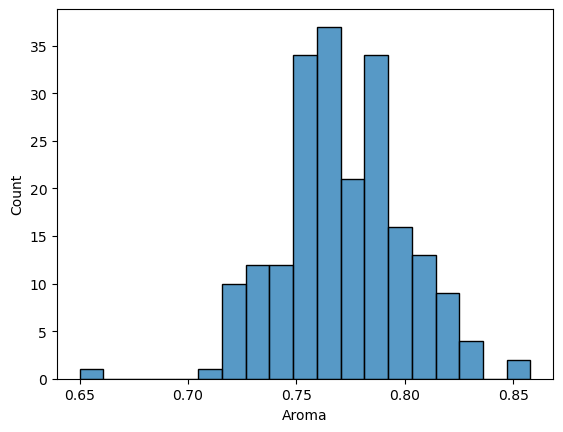

In [30]:
sns.histplot(data=df[scoreCols[0]])

<Axes: xlabel='Flavor', ylabel='Count'>

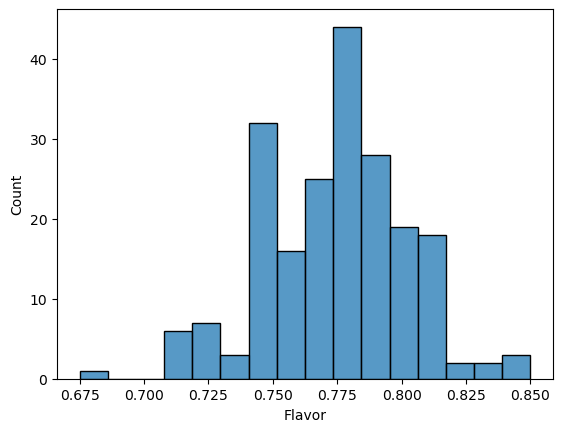

In [31]:
sns.histplot(data=df[scoreCols[1]])

<Axes: xlabel='Aftertaste', ylabel='Count'>

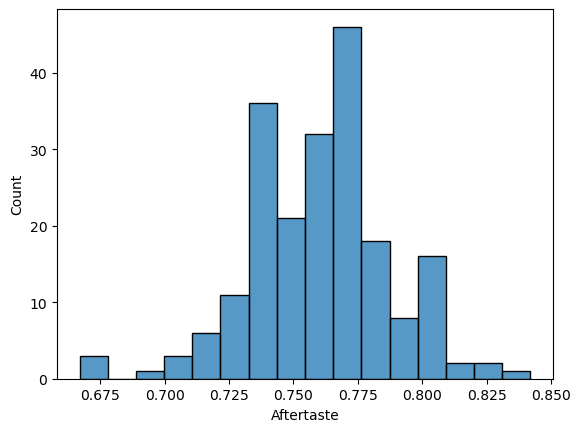

In [32]:
sns.histplot(data=df[scoreCols[2]])

<Axes: xlabel='Acidity', ylabel='Count'>

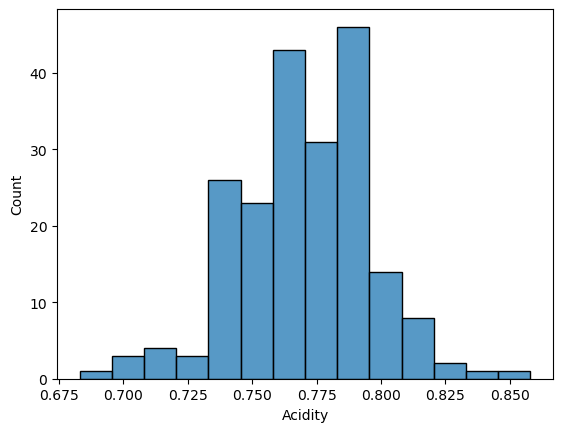

In [33]:
sns.histplot(data=df[scoreCols[3]])

<Axes: xlabel='Body', ylabel='Count'>

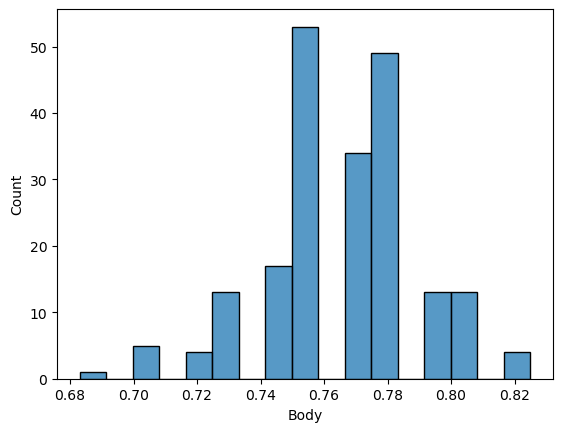

In [34]:
sns.histplot(data=df[scoreCols[4]])

<Axes: xlabel='Moisture Percentage', ylabel='Count'>

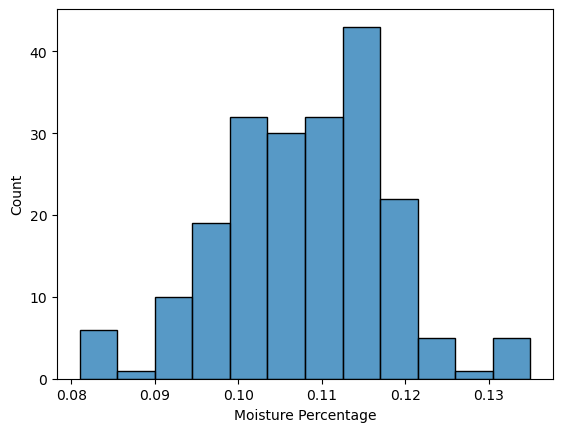

In [35]:
sns.histplot(data=df['Moisture Percentage'])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [38]:
from sklearn.cluster import KMeans
numCountries = len(df['Country of Origin'].value_counts())

kmModel = KMeans(n_clusters=numCountries)

kmModel.fit(X)

print(kmModel.inertia_)

0.11113589189455053


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False]), 0)

/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

[0.8943024660194182, 0.45441603856383, 0.32559829556404235, 0.2693844862848174, 0.2293623720101315, 0.21300735418405178, 0.20110764609421655, 0.18926682409445633, 0.17984057371564843, 0.1721550164914923, 0.16573650531525974, 0.15822776196216226, 0.15345516231674367, 0.14541300718413128, 0.14059469112108489, 0.13730802073618914, 0.131348688437951, 0.12479124945771625, 0.12058565845184235, 0.12212593896920079, 0.11452222773891318, 0.11104073863636368, 0.10890490824000568, 0.10452821147186153]


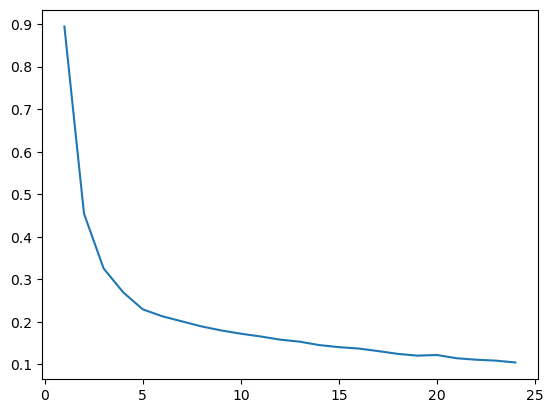

In [39]:

inertias = []

for i in range(1, 25):
    kmModel = KMeans(n_clusters=i)
    kmModel.fit(X)
    inertias.append(kmModel.inertia_)

sns.lineplot(x=range(1, 25), y=inertias)
print(inertias)